In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import collections

In [2]:
data = pd.read_csv("./data/202107-citibike-tripdata.csv", low_memory=False)

## Warm Up Questions

In [3]:
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,247BA541A9674BF3,classic_bike,2021-07-09 16:05:36,2021-07-09 16:18:09,5 Ave & E 93 St,7372.10,Frederick Douglass Blvd & W 117 St,7688.12,40.785785,-73.957481,40.805159,-73.954692,member
1,125C9ACA270A5E2D,classic_bike,2021-07-11 16:23:35,2021-07-11 16:29:07,5 Ave & E 93 St,7372.10,E 88 St & Park Ave,7293.10,40.785785,-73.957481,40.781411,-73.955959,member
2,2E26264BCC15BA05,classic_bike,2021-07-23 06:22:40,2021-07-23 06:36:13,34 St & 38 Ave,6453.02,McGuinness Blvd & Eagle St,5977.01,40.752443,-73.929737,40.735550,-73.952840,member
3,A56D23A088563424,classic_bike,2021-07-05 16:08:10,2021-07-05 16:36:00,Lenox Ave & W 111 St,7602.05,5 Ave & E 78 St,7161.08,40.798786,-73.952300,40.776321,-73.964274,casual
4,1451F4BB884C5335,classic_bike,2021-07-26 12:28:57,2021-07-26 12:30:21,6 Ave & Broome St,5610.09,6 Ave & Canal St,5500.07,40.724310,-74.004730,40.722438,-74.005664,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084532,70330CE2E6FF7873,classic_bike,2021-07-08 14:08:12,2021-07-08 14:35:15,DeKalb Ave & S Portland Ave,4546.04,E 16 St & 5 Ave,6022.04,40.689810,-73.974931,40.737262,-73.992390,casual
3084533,5F986BABD3470AC0,classic_bike,2021-07-24 12:26:49,2021-07-24 12:47:18,9 Ave & W 18 St,6190.08,West St & Liberty St,5184.08,40.743174,-74.003664,40.711444,-74.014847,casual
3084534,88946134552A99EC,classic_bike,2021-07-04 17:11:16,2021-07-04 17:18:23,DeKalb Ave & S Portland Ave,4546.04,Willoughby Ave & Hall St,4611.03,40.689810,-73.974931,40.691960,-73.965369,casual
3084535,5AA6219AC31E068E,classic_bike,2021-07-30 09:43:46,2021-07-30 09:57:50,9 Ave & W 18 St,6190.08,Allen St & Stanton St,5484.09,40.743174,-74.003664,40.722055,-73.989111,member


## Question 1:

In [4]:
#covert type from string to datetime
data["started_at"]=pd.to_datetime(data["started_at"])
data["ended_at"]=pd.to_datetime(data["ended_at"])

In [5]:
data["started_at"][0]

Timestamp('2021-07-09 16:05:36')

In [6]:
data["ended_at"][0]

Timestamp('2021-07-09 16:18:09')

In [7]:
data["duration"]=data["ended_at"]-data["started_at"]

In [8]:
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration
0,247BA541A9674BF3,classic_bike,2021-07-09 16:05:36,2021-07-09 16:18:09,5 Ave & E 93 St,7372.10,Frederick Douglass Blvd & W 117 St,7688.12,40.785785,-73.957481,40.805159,-73.954692,member,0 days 00:12:33
1,125C9ACA270A5E2D,classic_bike,2021-07-11 16:23:35,2021-07-11 16:29:07,5 Ave & E 93 St,7372.10,E 88 St & Park Ave,7293.10,40.785785,-73.957481,40.781411,-73.955959,member,0 days 00:05:32
2,2E26264BCC15BA05,classic_bike,2021-07-23 06:22:40,2021-07-23 06:36:13,34 St & 38 Ave,6453.02,McGuinness Blvd & Eagle St,5977.01,40.752443,-73.929737,40.735550,-73.952840,member,0 days 00:13:33
3,A56D23A088563424,classic_bike,2021-07-05 16:08:10,2021-07-05 16:36:00,Lenox Ave & W 111 St,7602.05,5 Ave & E 78 St,7161.08,40.798786,-73.952300,40.776321,-73.964274,casual,0 days 00:27:50
4,1451F4BB884C5335,classic_bike,2021-07-26 12:28:57,2021-07-26 12:30:21,6 Ave & Broome St,5610.09,6 Ave & Canal St,5500.07,40.724310,-74.004730,40.722438,-74.005664,casual,0 days 00:01:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084532,70330CE2E6FF7873,classic_bike,2021-07-08 14:08:12,2021-07-08 14:35:15,DeKalb Ave & S Portland Ave,4546.04,E 16 St & 5 Ave,6022.04,40.689810,-73.974931,40.737262,-73.992390,casual,0 days 00:27:03
3084533,5F986BABD3470AC0,classic_bike,2021-07-24 12:26:49,2021-07-24 12:47:18,9 Ave & W 18 St,6190.08,West St & Liberty St,5184.08,40.743174,-74.003664,40.711444,-74.014847,casual,0 days 00:20:29
3084534,88946134552A99EC,classic_bike,2021-07-04 17:11:16,2021-07-04 17:18:23,DeKalb Ave & S Portland Ave,4546.04,Willoughby Ave & Hall St,4611.03,40.689810,-73.974931,40.691960,-73.965369,casual,0 days 00:07:07
3084535,5AA6219AC31E068E,classic_bike,2021-07-30 09:43:46,2021-07-30 09:57:50,9 Ave & W 18 St,6190.08,Allen St & Stanton St,5484.09,40.743174,-74.003664,40.722055,-73.989111,member,0 days 00:14:04


In [9]:
min(data["duration"])

Timedelta('-1 days +23:49:50')

In [10]:
max(data["duration"])

Timedelta('33 days 22:32:47')

In [11]:
#calculate trip duration in minutes
data["time_mins"] = data['duration'].dt.total_seconds().div(60).astype(float)

In [12]:
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,time_mins
0,247BA541A9674BF3,classic_bike,2021-07-09 16:05:36,2021-07-09 16:18:09,5 Ave & E 93 St,7372.10,Frederick Douglass Blvd & W 117 St,7688.12,40.785785,-73.957481,40.805159,-73.954692,member,0 days 00:12:33,12.550000
1,125C9ACA270A5E2D,classic_bike,2021-07-11 16:23:35,2021-07-11 16:29:07,5 Ave & E 93 St,7372.10,E 88 St & Park Ave,7293.10,40.785785,-73.957481,40.781411,-73.955959,member,0 days 00:05:32,5.533333
2,2E26264BCC15BA05,classic_bike,2021-07-23 06:22:40,2021-07-23 06:36:13,34 St & 38 Ave,6453.02,McGuinness Blvd & Eagle St,5977.01,40.752443,-73.929737,40.735550,-73.952840,member,0 days 00:13:33,13.550000
3,A56D23A088563424,classic_bike,2021-07-05 16:08:10,2021-07-05 16:36:00,Lenox Ave & W 111 St,7602.05,5 Ave & E 78 St,7161.08,40.798786,-73.952300,40.776321,-73.964274,casual,0 days 00:27:50,27.833333
4,1451F4BB884C5335,classic_bike,2021-07-26 12:28:57,2021-07-26 12:30:21,6 Ave & Broome St,5610.09,6 Ave & Canal St,5500.07,40.724310,-74.004730,40.722438,-74.005664,casual,0 days 00:01:24,1.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084532,70330CE2E6FF7873,classic_bike,2021-07-08 14:08:12,2021-07-08 14:35:15,DeKalb Ave & S Portland Ave,4546.04,E 16 St & 5 Ave,6022.04,40.689810,-73.974931,40.737262,-73.992390,casual,0 days 00:27:03,27.050000
3084533,5F986BABD3470AC0,classic_bike,2021-07-24 12:26:49,2021-07-24 12:47:18,9 Ave & W 18 St,6190.08,West St & Liberty St,5184.08,40.743174,-74.003664,40.711444,-74.014847,casual,0 days 00:20:29,20.483333
3084534,88946134552A99EC,classic_bike,2021-07-04 17:11:16,2021-07-04 17:18:23,DeKalb Ave & S Portland Ave,4546.04,Willoughby Ave & Hall St,4611.03,40.689810,-73.974931,40.691960,-73.965369,casual,0 days 00:07:07,7.116667
3084535,5AA6219AC31E068E,classic_bike,2021-07-30 09:43:46,2021-07-30 09:57:50,9 Ave & W 18 St,6190.08,Allen St & Stanton St,5484.09,40.743174,-74.003664,40.722055,-73.989111,member,0 days 00:14:04,14.066667


In [13]:
max(data["time_mins"])

48872.78333333333

In [14]:
min(data["time_mins"])

-10.166666666666666

In [15]:
data["time_mins"].count()

3084537

In [16]:
time_mins = data["time_mins"]

In [17]:
x = np.linspace(0,140,100)

In [18]:
x

array([  0.        ,   1.41414141,   2.82828283,   4.24242424,
         5.65656566,   7.07070707,   8.48484848,   9.8989899 ,
        11.31313131,  12.72727273,  14.14141414,  15.55555556,
        16.96969697,  18.38383838,  19.7979798 ,  21.21212121,
        22.62626263,  24.04040404,  25.45454545,  26.86868687,
        28.28282828,  29.6969697 ,  31.11111111,  32.52525253,
        33.93939394,  35.35353535,  36.76767677,  38.18181818,
        39.5959596 ,  41.01010101,  42.42424242,  43.83838384,
        45.25252525,  46.66666667,  48.08080808,  49.49494949,
        50.90909091,  52.32323232,  53.73737374,  55.15151515,
        56.56565657,  57.97979798,  59.39393939,  60.80808081,
        62.22222222,  63.63636364,  65.05050505,  66.46464646,
        67.87878788,  69.29292929,  70.70707071,  72.12121212,
        73.53535354,  74.94949495,  76.36363636,  77.77777778,
        79.19191919,  80.60606061,  82.02020202,  83.43434343,
        84.84848485,  86.26262626,  87.67676768,  89.09

Text(0, 0.5, 'Frequency')

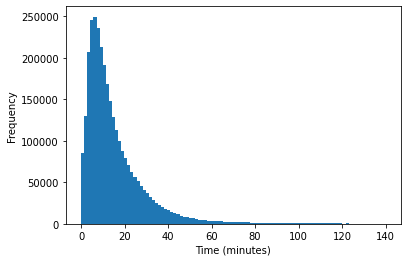

In [19]:
plt.hist(time_mins, x)
plt.xlabel("Time (minutes)")
plt.ylabel("Frequency")

In [20]:
len(data[(data["time_mins"]<140) & (data["time_mins"]>0)])/len(data)

0.9949042595371688

99.5% of the data falls between a trip duration of 0 to 140 minutes. 
The negative data points and any points longer than 140 minutes were removed as outliers

In [21]:
data_clean = data[data["time_mins"]>0]
data_clean = data_clean[data_clean["time_mins"]<140]

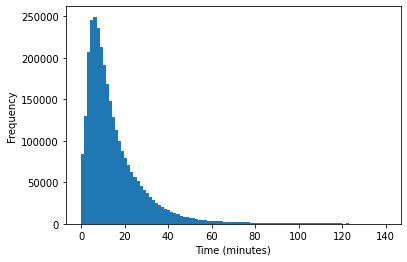

In [22]:
plt.hist(data_clean["time_mins"], x)
plt.xlabel("Time (minutes)")
plt.ylabel("Frequency")
plt.savefig("Q1_histogram", bbox_inches='tight')

## Question 2:

In [23]:
#average ride duration:
sum(data_clean["time_mins"])/len(data_clean)

15.445045243789094

In [24]:
#empiracle variance
np.var(data_clean["time_mins"])

215.31563050088096

In [25]:
#probability that a ride duration is greater than 20 mins
len(data_clean[data_clean["time_mins"]>20])/len(data_clean)

0.24612139067178612

## Question 3: 

In [26]:
len(data_clean[(data_clean["time_mins"]>20) & (data_clean["member_casual"] == "member")])/len(data_clean[data_clean["member_casual"] == "member"])

0.1926962400818294

## Question 4:

In [27]:
#P(member|d>25) = P(d>25|member)P(member)/ (P(d>25|member)P(member)*P(d>25|casual)P(casual))
prob_member = len(data_clean[data_clean["member_casual"] == "member"])/len(data_clean)
print(prob_member)
prob_casual = len(data_clean[data_clean["member_casual"] == "casual"])/len(data_clean)
print(prob_casual)
prob25_casual = len(data_clean[(data_clean["member_casual"] == "member") & (data_clean["time_mins"] > 25)])/len(data_clean[data_clean["member_casual"] == "member"])
print(prob25_casual)
prob25_member = len(data_clean[(data_clean["member_casual"] == "casual") & (data_clean["time_mins"] > 25)])/len(data_clean[data_clean["member_casual"] == "casual"])
print(prob25_member)
result = (prob25_member*prob_member)/((prob25_casual*prob_casual) + (prob25_member*prob_member))
print(result)

0.6572166686924188
0.3427833313075812
0.12523259947671625
0.2505180903853832
0.7931918417690926


## Project

In [28]:
#Only look at weekday data
data_clean["start_day"]=data_clean["started_at"].dt.weekday
data_clean["end_day"]=data_clean["ended_at"].dt.weekday

In [29]:
data_clean

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,time_mins,start_day,end_day
0,247BA541A9674BF3,classic_bike,2021-07-09 16:05:36,2021-07-09 16:18:09,5 Ave & E 93 St,7372.10,Frederick Douglass Blvd & W 117 St,7688.12,40.785785,-73.957481,40.805159,-73.954692,member,0 days 00:12:33,12.550000,4,4
1,125C9ACA270A5E2D,classic_bike,2021-07-11 16:23:35,2021-07-11 16:29:07,5 Ave & E 93 St,7372.10,E 88 St & Park Ave,7293.10,40.785785,-73.957481,40.781411,-73.955959,member,0 days 00:05:32,5.533333,6,6
2,2E26264BCC15BA05,classic_bike,2021-07-23 06:22:40,2021-07-23 06:36:13,34 St & 38 Ave,6453.02,McGuinness Blvd & Eagle St,5977.01,40.752443,-73.929737,40.735550,-73.952840,member,0 days 00:13:33,13.550000,4,4
3,A56D23A088563424,classic_bike,2021-07-05 16:08:10,2021-07-05 16:36:00,Lenox Ave & W 111 St,7602.05,5 Ave & E 78 St,7161.08,40.798786,-73.952300,40.776321,-73.964274,casual,0 days 00:27:50,27.833333,0,0
4,1451F4BB884C5335,classic_bike,2021-07-26 12:28:57,2021-07-26 12:30:21,6 Ave & Broome St,5610.09,6 Ave & Canal St,5500.07,40.724310,-74.004730,40.722438,-74.005664,casual,0 days 00:01:24,1.400000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084532,70330CE2E6FF7873,classic_bike,2021-07-08 14:08:12,2021-07-08 14:35:15,DeKalb Ave & S Portland Ave,4546.04,E 16 St & 5 Ave,6022.04,40.689810,-73.974931,40.737262,-73.992390,casual,0 days 00:27:03,27.050000,3,3
3084533,5F986BABD3470AC0,classic_bike,2021-07-24 12:26:49,2021-07-24 12:47:18,9 Ave & W 18 St,6190.08,West St & Liberty St,5184.08,40.743174,-74.003664,40.711444,-74.014847,casual,0 days 00:20:29,20.483333,5,5
3084534,88946134552A99EC,classic_bike,2021-07-04 17:11:16,2021-07-04 17:18:23,DeKalb Ave & S Portland Ave,4546.04,Willoughby Ave & Hall St,4611.03,40.689810,-73.974931,40.691960,-73.965369,casual,0 days 00:07:07,7.116667,6,6
3084535,5AA6219AC31E068E,classic_bike,2021-07-30 09:43:46,2021-07-30 09:57:50,9 Ave & W 18 St,6190.08,Allen St & Stanton St,5484.09,40.743174,-74.003664,40.722055,-73.989111,member,0 days 00:14:04,14.066667,4,4


In [30]:
#remove weekend rides
data_clean = data_clean[data_clean["start_day"] < 5]
data_clean = data_clean[data_clean["end_day"] < 5]

In [31]:
data_clean["start_station_id"].value_counts()

6140.05    9887
5980.07    9543
5329.03    9495
6173.08    9143
6912.01    9096
           ... 
6474.02      15
7983.04      13
8040.03      12
8711.02       6
7226.03       2
Name: start_station_id, Length: 1487, dtype: int64

In [32]:
data_clean["end_station_id"].value_counts()

6140.05    9919
5980.07    9822
5329.03    9476
6912.01    9194
6173.08    9051
           ... 
HB505         1
JC052         1
HB402         1
JC103         1
HB602         1
Name: end_station_id, Length: 1509, dtype: int64

In [33]:
data_clean.loc[data_clean['start_station_id'] == 6140.05]["start_station_name"][4566]

'W 21 St & 6 Ave'

In [34]:
data_clean.loc[data_clean['start_station_id'] == 5980.07]["start_station_name"][589790]

'E 17 St & Broadway'

In [35]:
data_clean.loc[data_clean['start_station_id'] == 5329.03]["start_station_name"][2805]

'West St & Chambers St'

In [36]:
data_clean

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,duration,time_mins,start_day,end_day
0,247BA541A9674BF3,classic_bike,2021-07-09 16:05:36,2021-07-09 16:18:09,5 Ave & E 93 St,7372.10,Frederick Douglass Blvd & W 117 St,7688.12,40.785785,-73.957481,40.805159,-73.954692,member,0 days 00:12:33,12.550000,4,4
2,2E26264BCC15BA05,classic_bike,2021-07-23 06:22:40,2021-07-23 06:36:13,34 St & 38 Ave,6453.02,McGuinness Blvd & Eagle St,5977.01,40.752443,-73.929737,40.735550,-73.952840,member,0 days 00:13:33,13.550000,4,4
3,A56D23A088563424,classic_bike,2021-07-05 16:08:10,2021-07-05 16:36:00,Lenox Ave & W 111 St,7602.05,5 Ave & E 78 St,7161.08,40.798786,-73.952300,40.776321,-73.964274,casual,0 days 00:27:50,27.833333,0,0
4,1451F4BB884C5335,classic_bike,2021-07-26 12:28:57,2021-07-26 12:30:21,6 Ave & Broome St,5610.09,6 Ave & Canal St,5500.07,40.724310,-74.004730,40.722438,-74.005664,casual,0 days 00:01:24,1.400000,0,0
6,705C67CE4C430371,classic_bike,2021-07-05 15:47:30,2021-07-05 16:12:06,Grove St & Broadway,4526.01,Knickerbocker Ave & George St,4979.07,40.690470,-73.923511,40.704425,-73.928360,casual,0 days 00:24:36,24.600000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3084526,8DC665061833E1A3,classic_bike,2021-07-27 15:24:24,2021-07-27 15:51:54,9 Ave & W 18 St,6190.08,West St & Liberty St,5184.08,40.743174,-74.003664,40.711444,-74.014847,casual,0 days 00:27:30,27.500000,1,1
3084527,3FE6E2DD14986791,classic_bike,2021-07-28 16:33:07,2021-07-28 17:08:13,Riverside Dr & W 82 St,7388.10,Allen St & Stanton St,5484.09,40.787209,-73.981281,40.722055,-73.989111,casual,0 days 00:35:06,35.100000,2,2
3084532,70330CE2E6FF7873,classic_bike,2021-07-08 14:08:12,2021-07-08 14:35:15,DeKalb Ave & S Portland Ave,4546.04,E 16 St & 5 Ave,6022.04,40.689810,-73.974931,40.737262,-73.992390,casual,0 days 00:27:03,27.050000,3,3
3084535,5AA6219AC31E068E,classic_bike,2021-07-30 09:43:46,2021-07-30 09:57:50,9 Ave & W 18 St,6190.08,Allen St & Stanton St,5484.09,40.743174,-74.003664,40.722055,-73.989111,member,0 days 00:14:04,14.066667,4,4


In [37]:
#create dataframe where 'W 21 St & 6 Ave' is either the started at or ended at station
W21_data_start = data_clean[(data_clean["start_station_name"]=='W 21 St & 6 Ave')]
W21_data_end = data_clean[(data_clean["end_station_name"]=='W 21 St & 6 Ave')]

In [38]:
W21_start_index = pd.DatetimeIndex(W21_data_start['started_at'])
W21_end_index = pd.DatetimeIndex(W21_data_end['ended_at'])
W21_start_morn = W21_data_start.iloc[W21_start_index.indexer_between_time('6:00','11:00')]
W21_end_morn = W21_data_end.iloc[W21_end_index.indexer_between_time('6:00','11:00')]
W21_start_night = W21_data_start.iloc[W21_start_index.indexer_between_time('16:00','21:00')]
W21_end_night = W21_data_end.iloc[W21_end_index.indexer_between_time('16:00','21:00')]

In [39]:
#create list of days we are interested in
start_date = datetime.date(2021, 7, 1)
end_date = datetime.date(2021, 7, 31)
delta = datetime.timedelta(days=1)
days = []
while start_date <= end_date:
    if start_date.weekday() <5:
        days.append(start_date)
    start_date += delta

In [40]:
#create list of times we are interested in
def time_interval(start_hour, end_hour, minute, interval):
    return [
        f"{str(i).zfill(2)}:{str(j).zfill(2)}" 
        for i in range(start_hour, end_hour)
        for j in range(minute)
        if j % interval == 0
    ]
morn_times = time_interval(6,11, 60, 10)
morn_times.append('11:00')
night_times= time_interval(16,21,60,10)
night_times.append('21:00')

In [41]:
def count_per_day_per_time(df, times_list, out):
    if out == True:
        index='started_at'
    elif out ==False:
        index='ended_at'
#gets the number of bikes in or out of each station per day per time
#returns a list of length days*time_ints
    count_list = []
    for i in range(len(days)):
        byDay = df[df[index].dt.date == days[i]]
        byDay.reset_index(drop=False, inplace=True)
        byDay.set_index(byDay[index], inplace=True)
        for j in range(len(times_list)-1):
            byDayTime = byDay.between_time(times_list[j], times_list[j+1])
            count = len(byDayTime)
            count_list.append(count)
    return count_list

In [42]:
#subtract lists to get net change for each time interval
#list1 should be in (end)
#list2 should be out (start)
def get_rate_list(list1, list2):
    rate = []
    zip_lists = zip(list1, list2)
    for list1_i, list2_i in zip_lists:
        rate.append(list1_i-list2_i)
    return rate

In [43]:
get_rate_list([4,3], [2,3])

[2, 0]

In [44]:
def CountFrequency(rates, docks):
    freq = {}
    for item in rates:
        if (item in freq):
            freq[item] += 1
        else:
            freq[item] = 1
    for i in range(-docks,docks+1):
        if i not in freq:
            freq[i] = 0
    return collections.OrderedDict(sorted(freq.items()))

In [45]:
#where 2 is the current state
def create_probab_matrix(frequencies, total_docks):
    p = np.matrix(np.zeros((total_docks+1, total_docks+1)))
    for i in range(total_docks+1):
        freq_subset = {key: value for key, value in frequencies.items() if key+i <=42}
        freq_subset = {key: value for key, value in freq_subset.items() if key+i >=0}
        denom = 0
        count = 0
        for key in freq_subset:
            denom += freq_subset[key]
        for key in freq_subset:
            p[i,count] = (freq_subset[key]/denom)
            count+=1
    return p

In [46]:
#putting all the functions together:
W21_morn_out = count_per_day_per_time(W21_start_morn,morn_times,True)
W21_morn_in = count_per_day_per_time(W21_end_morn,morn_times,False)
W21_morn_rate = get_rate_list(W21_morn_in, W21_morn_out)
#W21 station has a capacity of 42 bikes
W21_freq_rates = CountFrequency(W21_morn_rate, 42)
W21_p_morn = create_probab_matrix(W21_freq_rates, 42)

In [47]:
W21_p_morn

matrix([[0.27078891, 0.25799574, 0.16204691, ..., 0.        , 0.        ,
         0.        ],
        [0.16548043, 0.22597865, 0.21530249, ..., 0.        , 0.        ,
         0.        ],
        [0.0771757 , 0.15270936, 0.20853859, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.24660194, 0.23495146,
         0.14757282],
        [0.        , 0.        , 0.        , ..., 0.2118451 , 0.28929385,
         0.27562642],
        [0.        , 0.        , 0.        , ..., 0.14779874, 0.29245283,
         0.39937107]])

In [48]:
np.set_printoptions(edgeitems=127)

In [49]:
#putting all the functions together:
W21_night_out = count_per_day_per_time(W21_start_night,night_times,True)
W21_night_in = count_per_day_per_time(W21_end_night,night_times,False)
W21_night_rate = get_rate_list(W21_night_in, W21_night_out)
#W21 station has a capacity of 42 bikes
W21_freq_rates = CountFrequency(W21_night_rate, 42)
W21_p_night = create_probab_matrix(W21_freq_rates, 42)

In [50]:
W21_p_night

matrix([[0.28012048, 0.22590361, 0.20783133, 0.09337349, 0.07228916,
         0.05722892, 0.03012048, 0.00903614, 0.01506024, 0.0060241 ,
         0.00301205, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.18024691, 0.22962963, 0.18518519, 0.17037037, 0.07654321,
         0.05925926, 0.04691358, 0.02469136, 0.00740741, 0.01234568,
         0.00493827, 0.00246914, 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 

In [51]:
#create dataframe where 'E 17 St & Broadway' is either the started at or ended at station
E17_data = data_clean[(data_clean["start_station_name"]=='E 17 St & Broadway') | (data_clean["end_station_name"]=='E 17 St & Broadway')]

In [52]:
#create dataframe where 'West St & Chambers St is either the started at or ended at station
WCham_data = data_clean[(data_clean["start_station_name"]=='West St & Chambers St') | (data_clean["end_station_name"]=='West St & Chambers St')]


Stationary distribution for each station

In [65]:
def stationary_dist(P):
    rowlen = P.shape[1]
    q = [(np.ones(rowlen))]
    b = [np.zeros(rowlen+1)]
    b[0][-1] = 1

    A = np.append(np.transpose(P) - np.identity(rowlen), q, axis=0)
    b = np.transpose(np.array(b))
    
    return np.linalg.solve(np.transpose(A).dot(A), np.transpose(A).dot(b))

In [66]:
stationary = stationary_dist(W21_p_morn)
print(stationary)

[[3.93161011e-06]
 [6.09564156e-06]
 [8.51566503e-06]
 [1.14191589e-05]
 [1.51554535e-05]
 [1.98483610e-05]
 [2.59035869e-05]
 [3.36186307e-05]
 [4.36470348e-05]
 [5.66305661e-05]
 [7.34918119e-05]
 [9.53540122e-05]
 [1.23721921e-04]
 [1.60532881e-04]
 [2.08300413e-04]
 [2.70292106e-04]
 [3.50722878e-04]
 [4.55087074e-04]
 [5.90506737e-04]
 [7.66223106e-04]
 [9.94239374e-04]
 [1.29009222e-03]
 [1.67400123e-03]
 [2.17207456e-03]
 [2.81836881e-03]
 [3.65704891e-03]
 [4.74500719e-03]
 [6.15633432e-03]
 [7.98561949e-03]
 [1.03556110e-02]
 [1.34273266e-02]
 [1.74060388e-02]
 [2.25519703e-02]
 [2.92058356e-02]
 [3.77883335e-02]
 [4.83239337e-02]
 [6.19427979e-02]
 [7.78694455e-02]
 [9.84644036e-02]
 [1.19605439e-01]
 [1.37817526e-01]
 [1.50209325e-01]
 [1.40220229e-01]]


Alternate iterative method

[[3.93955442e-06 6.10767851e-06 8.53187937e-06 1.14398923e-05
  1.51814800e-05 1.98802753e-05 2.59422643e-05 3.36647928e-05
  4.37017620e-05 5.66949306e-05 7.35670461e-05 9.54413649e-05
  1.23822737e-04 1.60648559e-04 2.08432388e-04 2.70441835e-04
  3.50891753e-04 4.55276428e-04 5.90717771e-04 7.66456823e-04
  9.94496493e-04 1.29037307e-03 1.67430563e-03 2.17240168e-03
  2.81871698e-03 3.65741544e-03 4.74538810e-03 6.15672412e-03
  7.98601076e-03 1.03559940e-02 1.34276889e-02 1.74063648e-02
  2.25522407e-02 2.92060268e-02 3.77884169e-02 4.83238802e-02
  6.19425665e-02 7.78690041e-02 9.84636960e-02 1.19604454e-01
  1.37816290e-01 1.50207902e-01 1.40218861e-01]]


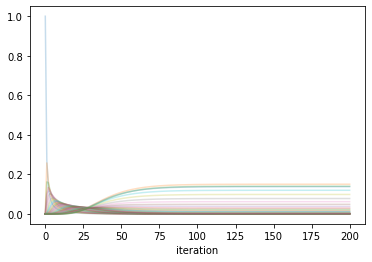

In [64]:
def find_stationary(P):
    from random import seed
    from random import random
    rowlen = P.shape[1]
    state=np.array([np.zeros(rowlen)])
    state[0][0] = 1
    stateHist=state
    dfStateHist=pd.DataFrame(state)
    distr_hist = [np.zeros(rowlen)]
    for x in range(200):
        state=np.dot(state,P)
        stateHist=np.append(stateHist,state,axis=0)
        dfDistrHist = pd.DataFrame(stateHist)

    dfDistrHist.plot(alpha=0.25)
    print(state)
    plt.legend('',frameon=False)
    plt.xlabel("iteration")
    plt.show()

find_stationary(W21_p_morn)